# EuroSat Imagery - EDA

In [1]:
%pylab inline

# import gdal
import rasterio
import tensorflow as tf
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


Images in the dataset are in in Geotif format with all the bands (13) in the same file. The code below is an example of a patch labeled as "Industrial". Each band has 60x60 pixeles. In a visual inspection, we can note note that each image has the same covered area. The resolution varies for different bands. 

In [13]:
sr_path = '/workspace/app/data/raw/EuroSat/fulldata/Industrial/'
# os.listdir(sr_path)

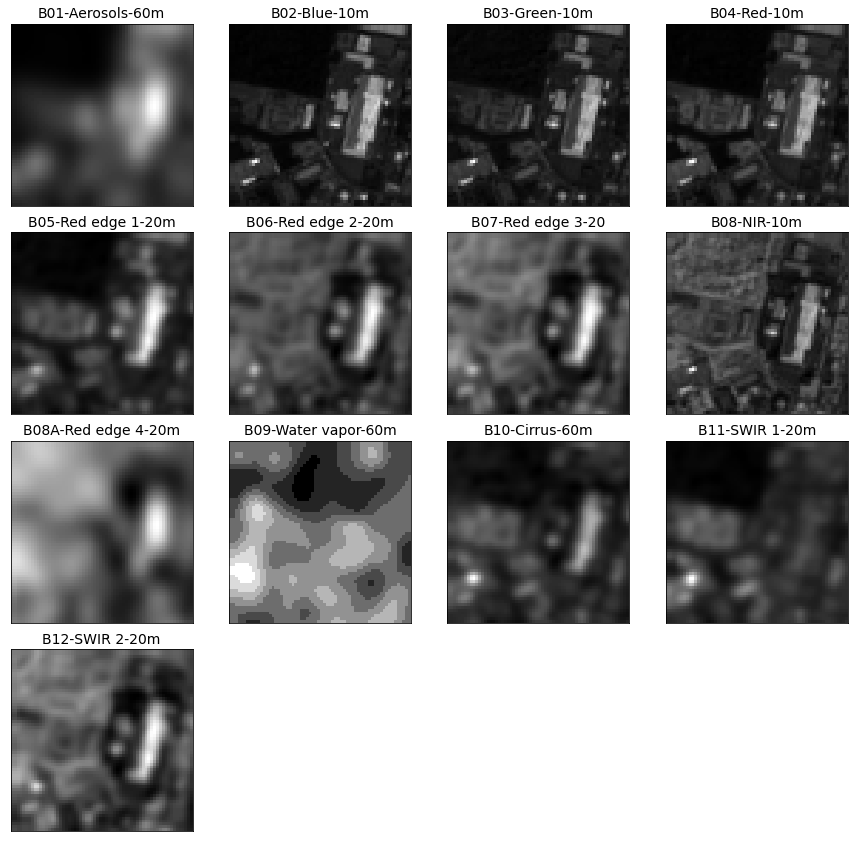

In [12]:
band_ds = rasterio.open(sr_path+'Industrial_1.tif')

plt.figure(figsize=(15,15))

bands_l =['B01-Aerosols-60m','B02-Blue-10m','B03-Green-10m',
          'B04-Red-10m','B05-Red edge 1-20m','B06-Red edge 2-20m',
          'B07-Red edge 3-20','B08-NIR-10m','B08A-Red edge 4-20m',
          'B09-Water vapor-60m','B10-Cirrus-60m','B11-SWIR 1-20m',
          'B12-SWIR 2-20m']

for idx in range(13): # 13 bands
    raster_band = np.array(band_ds.read(idx+1))
    img1 = np.array(raster_band)

    plt.subplots_adjust(hspace=.1)
    plt.subplot(4,4,idx+1)
    plt.imshow(img1,interpolation='nearest',cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(bands_l[idx], fontsize=14)

## RGB Images

The data set has 10 different labels. Images are saved in different folders according to its label. Each folder has the name of the corresponding label. Here, we plot one example per each label considereing only the RGB (B04,B03,B02, Respectively).

In [14]:
base_path = '/workspace/app/data/raw/EuroSat/'
rgbpath = os.path.join(base_path,'rgbdata/')
labels = os.listdir(rgbpath)
print(labels)

['Pasture', 'Industrial', 'PermanentCrop', 'AnnualCrop', 'Highway', 'HerbaceousVegetation', 'Residential', 'Forest', 'River', 'SeaLake']


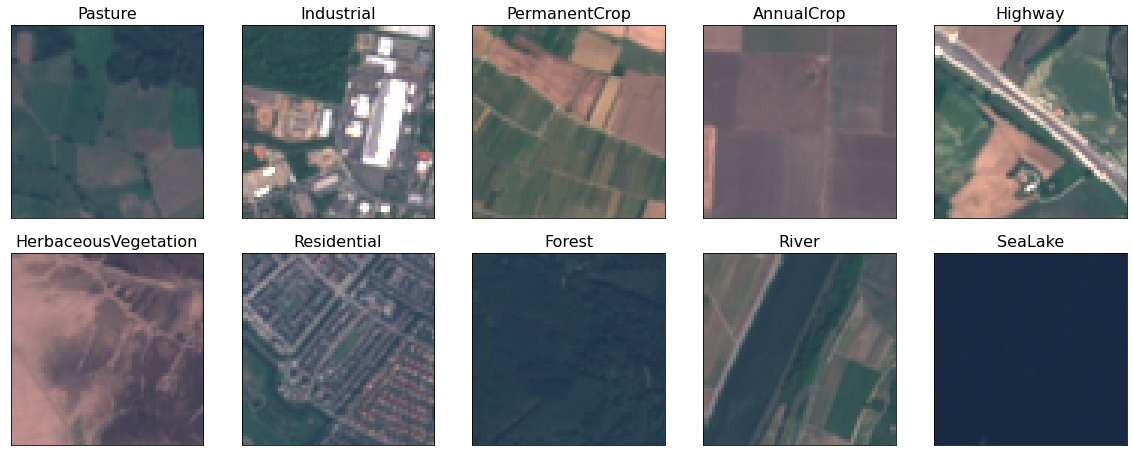

In [15]:
lcount={}

plt.figure(figsize=(20,8))

cont = 1
for lbl in labels:
  figpath = os.path.join(rgbpath,lbl+'/')
  lcount[lbl] = len(os.listdir(figpath))
  figname = figpath+lbl+'_1.jpg'
  img2 = mpimg.imread(figname)

  plt.subplots_adjust(hspace=.1)
  plt.subplot(2,5,cont)

  imgplot = plt.imshow(img2)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title(labels[cont-1], fontsize=16)
  cont = cont + 1

plt.show()

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

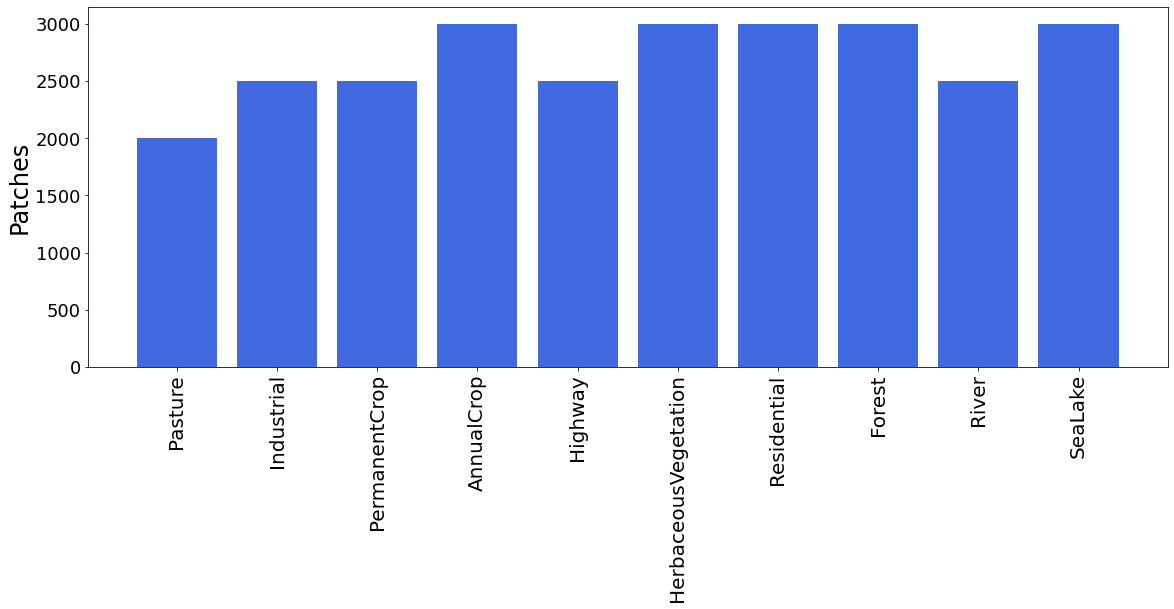

In [16]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
labels = lcount.keys()
count = lcount.values()
ax.bar(labels,count)

for bar in ax.patches:
    bar.set_facecolor('royalblue')
    
ax.set_ylabel('Patches',fontsize=24)
plt.xticks(rotation = 90,fontsize=20)
plt.yticks(fontsize=18)